In [ ]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import sys
import glob
import shutil
import time
import json
import ipaddress
import subprocess
import socket, struct
import seaborn as sns
from numpy import array
from random import random
from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier, VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [ ]:
import plotly.graph_objects as go

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
pip install pySankey

In [ ]:
from pySankey import sankey


In [ ]:
pip install scikit-plot


In [ ]:
import scikitplot as skplt

In [ ]:
netflow_host= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/NetFlow-Devicestreams.csv')


In [ ]:
netflow_host.shape

(711539, 17)

In [ ]:
netflow_unknown= pd.read_csv('/content/NetFlow_UnknownStreams.csv')

Split the dataset into 3 clases A, B and C according to second criterion

In [ ]:
#Class-A
class_A_IP = ['44.149.43.193','44.149.43.196','44.149.43.131','44.149.43.132','44.149.43.204','44.149.43.209', '44.149.43.198','44.149.43.195','44.149.43.197','44.149.43.202','44.149.43.213','44.149.43.199']

In [ ]:
class_A = netflow_host[netflow_host.sa.isin(class_A_IP)]
class_A

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
17926,44.149.43.132,104.236.30.141,41472,80,TCP,4.94,12.0,1062.0,4.0,405.0,0.0,14.0,1.0,Unassigned,Hypertext Transfer Protocol (HTTP),Linux-Ubuntu,Unknown_Device
17927,44.149.43.132,104.236.30.141,34284,80,TCP,4.74,12.0,1062.0,4.0,405.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol (HTTP),Linux-Ubuntu,Unknown_Device
17928,44.149.43.132,104.236.30.141,53446,80,TCP,3.87,12.0,1062.0,4.0,405.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol (HTTP),Linux-Ubuntu,Unknown_Device
17929,44.149.43.132,104.236.30.141,45008,80,TCP,3.86,12.0,1062.0,4.0,405.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol (HTTP),Linux-Ubuntu,Unknown_Device
17930,44.149.43.132,104.236.30.141,34016,80,TCP,7.34,12.0,1062.0,4.0,405.0,0.0,14.0,1.0,Unassigned,Hypertext Transfer Protocol (HTTP),Linux-Ubuntu,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711534,44.149.43.213,44.149.43.22,0,0,ICMP,0.00,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711535,44.149.43.213,44.149.43.22,0,0,ICMP,0.00,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711536,44.149.43.213,44.149.43.22,0,0,ICMP,0.00,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711537,44.149.43.213,44.149.43.22,0,0,ICMP,0.00,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device


In [ ]:
class_A.shape

(486243, 17)

In [ ]:
class_A.Device_Src.unique()

array(['Linux-Ubuntu', 'Mikrotik-BGP-Router', 'Mikrotik-Radio',
       'Mikrotik-Router', 'Linux-Raspbian', 'Linux-Debian',
       'SDR-RedPitaya', 'VOIP', 'Windows'], dtype=object)

In [ ]:
class_A.Device_Src.value_counts()

Mikrotik-BGP-Router    112881
Linux-Raspbian         107120
Linux-Ubuntu            82978
Windows                 58363
Linux-Debian            50473
SDR-RedPitaya           47246
Mikrotik-Router         15192
VOIP                     7499
Mikrotik-Radio           4491
Name: Device_Src, dtype: int64

In [ ]:
#Class-B
class_B_IP = ['44.149.43.129','44.149.43.200','44.149.43.130','44.149.43.136','44.149.43.207','44.149.43.134', '44.149.43.194','44.149.43.206','44.149.43.211','44.149.43.208']

In [ ]:
class_B = netflow_host[netflow_host.sa.isin(class_B_IP)]
class_B

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,41242,TCP,1.10,24.0,5239.0,18.0,1087.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
1,44.149.43.129,44.148.230.161,8728,40182,TCP,1.01,24.0,5244.0,19.0,1139.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
2,44.149.43.129,44.148.230.161,8728,39596,TCP,2.35,24.0,5244.0,18.0,1087.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
3,44.149.43.129,44.148.230.161,8728,38992,TCP,3.67,24.0,5244.0,18.0,1087.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
4,44.149.43.129,44.148.230.161,8728,38316,TCP,1.01,24.0,5242.0,19.0,1139.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642330,44.149.43.209,91.189.92.41,51986,443,TCP,0.00,18.0,3676.0,12.0,6058.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol Secure (HTTPS),Linux-Ubuntu,Unknown_Device
642331,44.149.43.209,91.189.92.41,40290,443,TCP,5.22,28.0,5008.0,27.0,25889.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol Secure (HTTPS),Linux-Ubuntu,Unknown_Device
642332,44.149.43.209,91.189.92.41,57162,443,TCP,0.00,18.0,3676.0,13.0,6110.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol Secure (HTTPS),Linux-Ubuntu,Unknown_Device
642333,44.149.43.209,91.189.92.41,33168,443,TCP,5.75,449.0,25026.0,603.0,866197.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol Secure (HTTPS),Linux-Ubuntu,Unknown_Device


In [ ]:
class_B.shape

(216765, 17)

In [ ]:
class_A.Device_Src.value_counts()

Mikrotik-BGP-Router    112881
Linux-Raspbian         107120
Linux-Ubuntu            82978
Windows                 58363
Linux-Debian            50473
SDR-RedPitaya           47246
Mikrotik-Router         15192
VOIP                     7499
Mikrotik-Radio           4491
Name: Device_Src, dtype: int64

In [ ]:
class_B.Device_Src.value_counts()

Linux-Ubuntu           171436
Mikrotik-Router         10731
SDR-RedPitaya            8586
Linux-Debian             8555
Mikrotik-BGP-Router      7195
Linux-Raspbian           5784
Mikrotik-Radio           4478
Name: Device_Src, dtype: int64

In [ ]:
class_A.sa.value_counts()

44.149.43.193    112881
44.149.43.198    107120
44.149.43.210     58363
44.149.43.132     54706
44.149.43.199     50473
44.149.43.207     28272
44.149.43.206     22478
44.149.43.202     22458
44.149.43.196      8607
44.149.43.203      7499
44.149.43.200      6585
44.149.43.195      4491
44.149.43.213      2310
Name: sa, dtype: int64

In [ ]:
class_B.sa.value_counts()

44.149.43.209    159660
44.149.43.197      8586
44.149.43.208      8555
44.149.43.129      7195
44.149.43.204      6978
44.149.43.134      5784
44.149.43.131      5651
44.149.43.130      5080
44.149.43.136      4798
44.149.43.194      4478
Name: sa, dtype: int64

In [ ]:
#Class-C
class_C_IP = ['44.149.43.193','44.149.43.196','44.149.43.131','44.149.43.132','44.149.43.204','44.149.43.209', '44.149.43.198','44.149.43.195','44.149.43.197','44.149.43.202','44.149.43.213','44.149.43.199','44.149.43.203','44.149.43.210']

In [ ]:
class_C = netflow_host[netflow_host.sa.isin(class_C_IP)]
class_C

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.193,44.149.43.198,53,34992,UDP,0.00,1.0,235.0,1.0,69.0,0.0,0.0,6.0,Domain Name System (DNS),Unassigned,Mikrotik-BGP-Router,Linux-Raspbian
1,44.149.43.193,44.149.43.198,53,35634,UDP,0.00,1.0,235.0,1.0,69.0,0.0,0.0,6.0,Domain Name System (DNS),Unassigned,Mikrotik-BGP-Router,Linux-Raspbian
2,44.149.43.193,44.149.43.198,53,35961,UDP,0.00,1.0,235.0,1.0,69.0,0.0,0.0,6.0,Domain Name System (DNS),Unassigned,Mikrotik-BGP-Router,Linux-Raspbian
3,44.149.43.193,44.149.43.198,53,36069,UDP,0.00,1.0,235.0,1.0,69.0,0.0,0.0,6.0,Domain Name System (DNS),Unassigned,Mikrotik-BGP-Router,Linux-Raspbian
4,44.149.43.193,44.149.43.198,53,37620,UDP,0.00,1.0,235.0,1.0,69.0,0.0,0.0,6.0,Domain Name System (DNS),Unassigned,Mikrotik-BGP-Router,Linux-Raspbian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711529,44.149.43.210,44.149.43.22,53377,1984,TCP,0.00,5.0,495.0,3.0,132.0,0.0,6.0,3.0,Unassigned,Big Brother,Windows,Unknown_Device
711530,44.149.43.210,44.149.43.22,53378,1984,TCP,0.00,15.0,13125.0,13.0,532.0,0.0,6.0,3.0,Unassigned,Big Brother,Windows,Unknown_Device
711531,44.149.43.210,44.149.43.22,53381,1984,TCP,0.00,5.0,2051.0,3.0,132.0,0.0,6.0,3.0,Unassigned,Big Brother,Windows,Unknown_Device
711532,44.149.43.210,52.242.97.97,53358,443,TCP,15.03,5.0,260.0,5.0,400.0,0.0,6.0,3.0,Unassigned,Hypertext Transfer Protocol Secure (HTTPS),Windows,Unknown_Device


In [ ]:
class_C.shape

(652179, 17)

In [ ]:
class_A.to_csv('Class_A_Datastream.csv', index= False)
class_B.to_csv('Class_B_Datastream.csv', index= False)
class_C.to_csv('Class_C_Datastream.csv', index= False)

In [ ]:
classA= pd.read_csv('/content/Class_A_Datastream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classB= pd.read_csv('/content/Class_B_Datastream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])
classC= pd.read_csv('/content/Class_C_Datastream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])

In [ ]:
#Feature Scaling and encoding
le = LabelEncoder()
sc = StandardScaler()
netflow_host['Device_Dst'] = le.fit_transform(netflow_host['Device_Dst'])
netflow_host['Src_value'] = le.fit_transform(netflow_host['Src_value'])
netflow_host['Dst_value'] = le.fit_transform(netflow_host['Dst_value'])
netflow_host['pr'] = le.fit_transform(netflow_host['pr'])
netflow_host['Device_Src'] = le.fit_transform(netflow_host['Device_Src'])

In [ ]:
#Feature Scaling and encoding
classA['Src_value'] = le.fit_transform(classA['Src_value'])
classA['Dst_value'] = le.fit_transform(classA['Dst_value'])
classA['pr'] = le.fit_transform(classA['pr'])
classA['Device_Src'] = le.fit_transform(classA['Device_Src'])



In [ ]:
classB['Src_value'] = le.fit_transform(classB['Src_value'])
classB['Dst_value'] = le.fit_transform(classB['Dst_value'])
classB['pr'] = le.fit_transform(classB['pr'])
classB['Device_Src'] = le.fit_transform(classB['Device_Src'])

In [ ]:
labels_dict = {index: value for index, value in enumerate(le.classes_)}
labels_dict

{0: 'Linux-Debian',
 1: 'Linux-Raspbian',
 2: 'Linux-Ubuntu',
 3: 'Mikrotik-BGP-Router',
 4: 'Mikrotik-Radio',
 5: 'Mikrotik-Router',
 6: 'SDR-RedPitaya'}

In [ ]:
classC['Src_value'] = le.fit_transform(classC['Src_value'])
classC['Dst_value'] = le.fit_transform(classC['Dst_value'])
classC['pr'] = le.fit_transform(classC['pr'])
classC['Device_Src'] = le.fit_transform(classC['Device_Src'])

In [ ]:
netflow_unknown['Device_Dst'] = le.fit_transform(netflow_unknown['Device_Dst'])
netflow_unknown['Src_value'] = le.fit_transform(netflow_unknown['Src_value'])
netflow_unknown['Dst_value'] = le.fit_transform(netflow_unknown['Dst_value'])
netflow_unknown['pr'] = le.fit_transform(netflow_unknown['pr'])
netflow_unknown['Device_Src'] = le.fit_transform(netflow_unknown['Device_Src'])

In [ ]:
#Normalisation
scaling = MinMaxScaler()
netflow_host[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(netflow_host[['td','ipkt','ibyt','opkt','obyt']])
netflow_unknown[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(netflow_unknown[['td','ipkt','ibyt','opkt','obyt','in','out']])
classA[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(classA[['td','ipkt','ibyt','opkt','obyt']])
classB[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(classB[['td','ipkt','ibyt','opkt','obyt']])
classC[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(classC[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
classA.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
0,44.149.43.132,104.236.30.141,41472,80,1,0.001345,0.000171,1.524052e-05,0.000115,0.000021,0.0,14.0,1.0,35,20,2
1,44.149.43.132,104.236.30.141,34284,80,1,0.001291,0.000171,1.524052e-05,0.000115,0.000021,0.0,6.0,3.0,35,20,2
2,44.149.43.132,104.236.30.141,53446,80,1,0.001054,0.000171,1.524052e-05,0.000115,0.000021,0.0,6.0,3.0,35,20,2
3,44.149.43.132,104.236.30.141,45008,80,1,0.001051,0.000171,1.524052e-05,0.000115,0.000021,0.0,6.0,3.0,35,20,2
4,44.149.43.132,104.236.30.141,34016,80,1,0.001999,0.000171,1.524052e-05,0.000115,0.000021,0.0,14.0,1.0,35,20,2
5,44.149.43.132,137.226.79.98,4520,4520,2,0.978739,0.027969,9.598855e-04,0.051862,0.004619,0.0,14.0,1.0,23,32,2
6,44.149.43.132,137.226.79.98,4520,4520,2,0.980370,0.027393,9.400995e-04,0.050508,0.004492,0.0,14.0,1.0,23,32,2
7,44.149.43.132,137.226.79.98,4520,4520,2,0.490180,0.013868,4.759321e-04,0.051286,0.004567,0.0,6.0,3.0,23,32,2
8,44.149.43.132,137.226.79.98,4520,4520,2,0.980373,0.027626,9.481208e-04,0.051171,0.004556,0.0,14.0,1.0,23,32,2
9,44.149.43.132,195.37.16.115,0,0,0,0.000316,0.000016,1.010093e-06,0.000000,0.000000,0.0,14.0,1.0,17,23,2


In [ ]:
classC.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
0,44.149.43.132,104.236.30.141,41472,80,1,0.001345,0.000171,1.524052e-05,0.000115,0.000021,0.0,1.000000,0.166667,38,20,2
1,44.149.43.132,104.236.30.141,34284,80,1,0.001291,0.000171,1.524052e-05,0.000115,0.000021,0.0,0.428571,0.500000,38,20,2
2,44.149.43.132,104.236.30.141,53446,80,1,0.001054,0.000171,1.524052e-05,0.000115,0.000021,0.0,0.428571,0.500000,38,20,2
3,44.149.43.132,104.236.30.141,45008,80,1,0.001051,0.000171,1.524052e-05,0.000115,0.000021,0.0,0.428571,0.500000,38,20,2
4,44.149.43.132,104.236.30.141,34016,80,1,0.001999,0.000171,1.524052e-05,0.000115,0.000021,0.0,1.000000,0.166667,38,20,2
5,44.149.43.132,137.226.79.98,4520,4520,2,0.978739,0.027969,9.598855e-04,0.051862,0.004619,0.0,1.000000,0.166667,24,32,2
6,44.149.43.132,137.226.79.98,4520,4520,2,0.980370,0.027393,9.400995e-04,0.050508,0.004492,0.0,1.000000,0.166667,24,32,2
7,44.149.43.132,137.226.79.98,4520,4520,2,0.490180,0.013868,4.759321e-04,0.051286,0.004567,0.0,0.428571,0.500000,24,32,2
8,44.149.43.132,137.226.79.98,4520,4520,2,0.980373,0.027626,9.481208e-04,0.051171,0.004556,0.0,1.000000,0.166667,24,32,2
9,44.149.43.132,195.37.16.115,0,0,0,0.000316,0.000016,1.010093e-06,0.000000,0.000000,0.0,1.000000,0.166667,17,23,2


In [ ]:
netflow_host.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,41242,2,0.000277,0.000276,0.000043,0.000245,0.000056,0.0,0.0,0.307692,40,73,3,6
1,44.149.43.129,44.148.230.161,8728,40182,2,0.000254,0.000276,0.000043,0.000259,0.000058,0.0,0.0,0.307692,40,73,3,6
2,44.149.43.129,44.148.230.161,8728,39596,2,0.000591,0.000276,0.000043,0.000245,0.000056,0.0,0.0,0.307692,40,73,3,6
3,44.149.43.129,44.148.230.161,8728,38992,2,0.000923,0.000276,0.000043,0.000245,0.000056,0.0,0.0,0.307692,40,73,3,6
4,44.149.43.129,44.148.230.161,8728,38316,2,0.000254,0.000276,0.000043,0.000259,0.000058,0.0,0.0,0.307692,40,73,3,6
5,44.149.43.129,44.148.230.161,8728,37404,2,0.000277,0.000276,0.000043,0.000245,0.000056,0.0,0.0,0.307692,40,73,3,6
6,44.149.43.129,44.148.230.161,8728,35944,2,0.000254,0.000276,0.000043,0.000259,0.000058,0.0,0.0,0.307692,40,73,3,6
7,44.149.43.129,44.148.230.161,8728,37442,2,0.000307,0.000276,0.000043,0.000259,0.000058,0.0,0.0,0.307692,40,73,3,6
8,44.149.43.129,44.148.230.161,8728,38778,2,0.000264,0.000276,0.000043,0.000259,0.000058,0.0,0.0,0.307692,40,73,3,6
9,44.149.43.129,44.148.230.161,8728,38246,2,0.000254,0.000276,0.000043,0.000245,0.000056,0.0,0.0,0.307692,40,73,3,6


Select input values and target values:

In [ ]:
x1 = classA.drop(['sa', 'da', 'Device_Src'],axis=1)
y1 = classA['Device_Src']

In [ ]:
x2 = classB.drop(['sa', 'da', 'Device_Src'],axis=1)
y2 = classB['Device_Src']

In [ ]:
x3 = classC.drop(['sa', 'da', 'Device_Src'],axis=1)
y3 = classC['Device_Src']

In [ ]:
x4 = netflow_host.drop(['sa', 'da', 'Device_Src','Device_Dst'],axis=1)
y4 = netflow_host['Device_Src']

In [ ]:
x5 = netflow_unknown.drop(['sa', 'da', 'Device_Src','Device_Dst'],axis=1)
y5 = netflow_unknown['Device_Src']

In [ ]:
#Splitting the dataset into Train and testing dataset
x4_train,x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.40, random_state=42)
x5_train,x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.40, random_state=42)

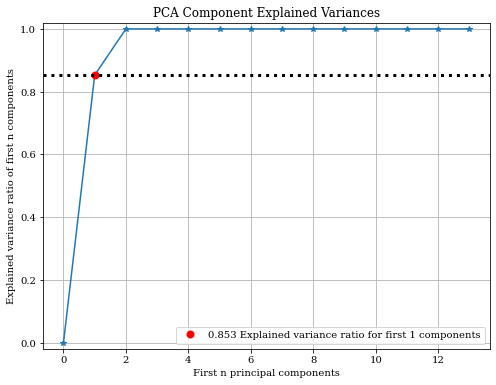

In [ ]:
pca = PCA(random_state=1)
pca.fit(x1)
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

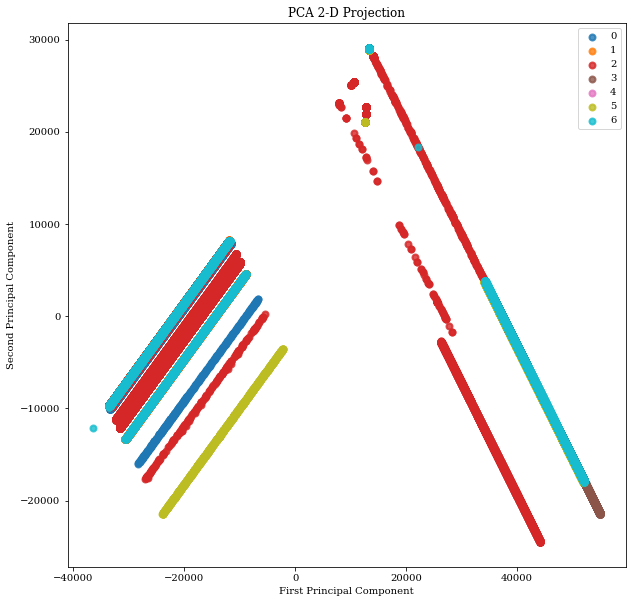

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x1, y1,
                                           figsize=(10,10),
                                           cmap="tab10");

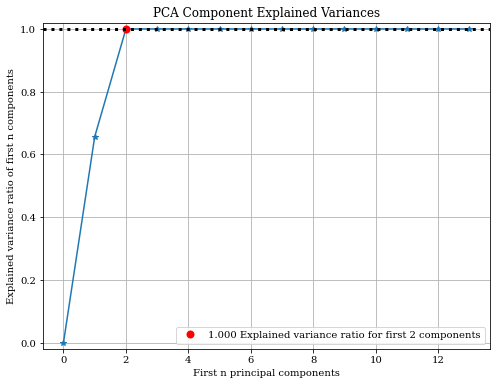

In [ ]:
pca = PCA(random_state=1)
pca.fit(x2)
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

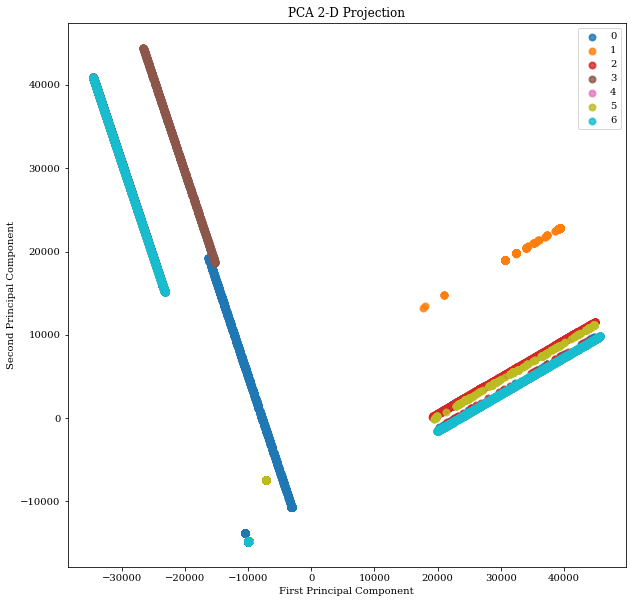

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x2, y2,
                                           figsize=(10,10),
                                           cmap="tab10");

In [ ]:
#K-NN 
model1 = KNeighborsClassifier()
model1.fit(x1, y1)


KNeighborsClassifier()

In [ ]:
print("Accuracy:",model1.score(x2, y2)*100)

Accuracy: 46.568070449541935


In [ ]:
bgknn = BaggingClassifier(KNeighborsClassifier())
bgknn.fit(x1,y1)
bgknn.score(x2,y2)

0.4671188125843335

In [ ]:
#Create new column for prediction and assign the predicted values to the testing dataset
predKNN = model1.predict(x2)
predknn_df = pd.DataFrame()
predknn_df['Device_KNN'] = predKNN
predknn_df['Device_KNN'] = predknn_df['Device_KNN'].map(labels_dict)
class_B['Device_KNN'] = predknn_df['Device_KNN']

In [ ]:
#Decision Trees
model5 = DecisionTreeClassifier(criterion = 'entropy')
prob = model5.fit(x1, y1)
print("Accuracy:",model5.score(x2, y2)*100)

Accuracy: 47.76205525175769


In [ ]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=250,
    max_samples=100, bootstrap=True)
bagging_clf.fit(x1,y1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=250)

In [ ]:
bagging_clf.score(x2,y2)

0.7822553440806761

In [ ]:
predDT = model5.predict(x2)
predDT_df = pd.DataFrame()
predDT_df['Device_DT'] = predDT
predDT_df['Device_DT'] = predDT_df['Device_DT'].map(labels_dict)
class_B['Device_DT'] = predDT_df['Device_DT']

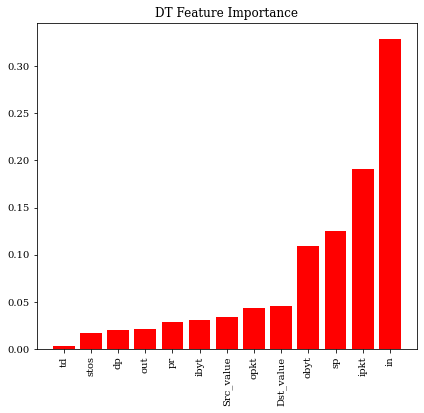

In [ ]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(model5, feature_names=x1.columns,
                                         title="DT Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

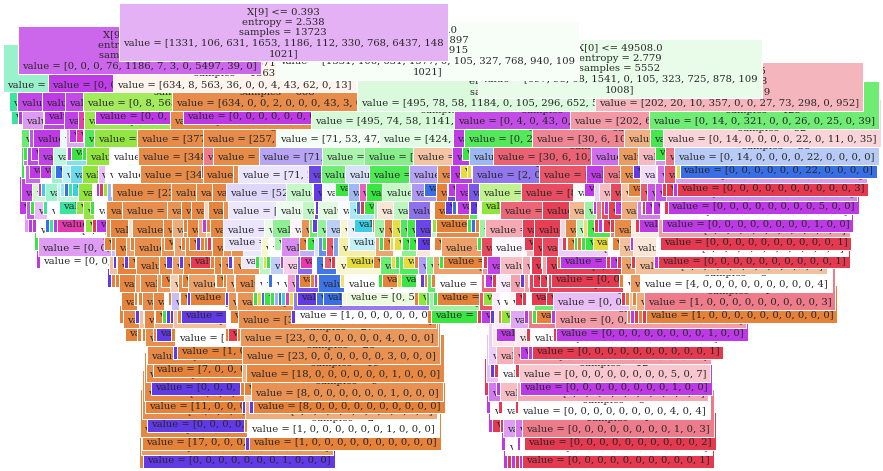

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,8)) 
tree.plot_tree(model5, filled=True, fontsize=10)
plt.show()

In [ ]:
#Random Forest
model6 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model6.fit(x1, y1)
print("Accuracy:",model6.score(x2, y2)*100)

Accuracy: 48.70259569632839


In [ ]:
bgrf = BaggingClassifier(RandomForestClassifier())
bgrf.fit(x1,y1)
bgrf.score(x2,y2)

0.4644378950358639

In [ ]:
predRF = model6.predict(x2)
predrf_df = pd.DataFrame()
predrf_df['Device_RF'] = predRF
predrf_df['Device_RF'] = predrf_df['Device_RF'].map(labels_dict)
class_B['Device_RF'] = predrf_df['Device_RF']

In [ ]:
classBprobatest = pd.DataFrame({
     "Device_Ip":list(class_B["sa"]),
     "Groundtruth":list(class_B["Device_Src"]),
     "predKNN":list(predKNN),
     "predXGBC":list(predXGBC),
     "predRF":list(predRF),
     "predDT":list(predDT),
     "probaKNN":list(probaknn),
     "probaDT":list(probadt),
     "probaRF":list(probarf),
     "probaXGBC":list(probaxgbc)
     })

classBprobatest.to_csv("classBprobatest1.csv", 
          index=False)

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(x1, y1)

XGBClassifier()


In [ ]:
print("Accuracy:",xgbc.score(x2, y2)*100)

Accuracy: 78.01026205525176


In [ ]:
predXGBC = xgbc.predict(x2)
predxgbc_df = pd.DataFrame()
predxgbc_df['Device_XGBC'] = predXGBC
predxgbc_df['Device_XGBC'] = predxgbc_df['Device_XGBC'].map(labels_dict)
class_B['Device_XGBC'] = predxgbc_df['Device_XGBC']

In [ ]:
#SVM Kernel
model2 = SVC(kernel = 'rbf', random_state = 0)
model2.fit(x1, y1)
print("Accuracy:",model2.score(x1_test, y1_test)*100)

Accuracy: 48.04023586541797


In [ ]:
predSVM = model2.predict(x2)
predsvm_df = pd.DataFrame()
predsvm_df['Device_SVM'] = predSVM
predsvm_df['Device_SVM'] = predsvm_df['Device_SVM'].map(Label_encode)
class_B['Device_SVM'] = predsvm_df['Device_SVM']

In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgbc = XGBClassifier()

In [ ]:
#Voting Classifier 1
evc = VotingClassifier( estimators= [('knn',knn),('dt',dt),('rf',rf)], voting = 'hard')

In [ ]:
evc.fit(x1,y1)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [ ]:
evc.score(x2,y2)

0.7904800795398054

In [ ]:
predVC = evc.predict(x2)
predvc_df = pd.DataFrame()
predvc_df['Device_VC'] = predVC
predvc_df['Device_VC'] = predvc_df['Device_VC'].map(labels_dict)
class_B['Device_VC'] = predvc_df['Device_VC']

In [ ]:
#Voting Classifier 2
evc1 = VotingClassifier( estimators= [('bgknn',bgknn),('bagging_clf',bagging_clf),('bgrf',bgrf)], voting = 'hard')

In [ ]:
evc1.fit(x1,y1)

VotingClassifier(estimators=[('bgknn',
                              BaggingClassifier(base_estimator=KNeighborsClassifier())),
                             ('bagging_clf',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=100,
                                                n_estimators=250)),
                             ('bgrf',
                              BaggingClassifier(base_estimator=RandomForestClassifier()))])

In [ ]:
evc1.score(x2,y2)

0.78565087706839

In [ ]:
estimator_list = [
    ('knn',knn),
    ('rf',rf),
    ('dt',dt)]

In [ ]:
#Stacking Classifier 1
sc = StackingClassifier(
    estimators=estimator_list, final_estimator=DecisionTreeClassifier()
)

In [ ]:
sc.fit(x1, y1)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=DecisionTreeClassifier())

In [ ]:
sc.score(x2,y2)

0.7623526383069384

In [ ]:
predSC = sc.predict(x2)
predsc_df = pd.DataFrame()
predsc_df['Device_SC'] = predSC
predsc_df['Device_SC'] = predsc_df['Device_SC'].map(labels_dict)
class_B['Device_SC'] = predsc_df['Device_SC']

In [ ]:
estimators= [('bgknn',bgknn),('bagging_clf',bagging_clf),('bgrf',bgrf)]

In [ ]:
#Stacking Classifier 2
sc2 = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [ ]:
sc2.fit(x1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


StackingClassifier(estimators=[('bgknn',
                                BaggingClassifier(base_estimator=KNeighborsClassifier())),
                               ('bagging_clf',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                  max_samples=100,
                                                  n_estimators=250)),
                               ('bgrf',
                                BaggingClassifier(base_estimator=RandomForestClassifier()))],
                   final_estimator=LogisticRegression())

In [ ]:
sc2.score(x2,y2)

0.7623526383069384